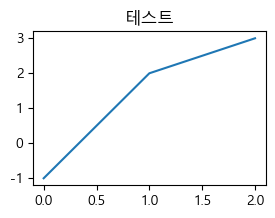

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 한글 폰트 설정
# ---------------------------------------

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ---------------------------------------
# 그래프 전역 크기 설정
# ---------------------------------------
plt.rc('figure', figsize=(12,5))

pass

## 초기 가설
- GDP가 높을수록 아이의 사망률이 낮다

In [31]:
# ----------------------------------------
# 데이터프레임 생성
#  - header : 헤더설정(중첩헤더 설정)
# ----------------------------------------

d1 = "C:/workspace/kiwoom-python/2_데이터분석/data/GDP와 아이도덕성지수/child_mortality_0_5_year_olds_dying_per_1000_born.csv"

d2 = 'C:/workspace/kiwoom-python/2_데이터분석/data/GDP와 아이도덕성지수/gdp_pcap.csv'


child_mortality = pd.read_csv(d1)
gdp = pd.read_csv(d2)

gdp

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,481,481,481,481,481,481,481,481,481,...,4680,4790,4910,5020,5140,5260,5380,5510,5640,5780
1,Angola,373,374,376,378,379,381,383,385,386,...,24.5k,25k,25.6k,26.1k,26.6k,27.1k,27.7k,28.2k,28.8k,29.3k
2,Albania,469,471,472,473,475,476,477,479,480,...,54.5k,55.1k,55.7k,56.3k,56.9k,57.4k,58k,58.6k,59.2k,59.8k
3,Andorra,1370,1370,1370,1380,1380,1380,1390,1390,1390,...,79.9k,80.2k,80.4k,80.7k,81k,81.3k,81.5k,81.8k,82k,82.3k
4,UAE,1140,1150,1150,1150,1160,1160,1170,1170,1180,...,92.6k,92.6k,92.6k,92.7k,92.7k,92.7k,92.8k,92.8k,92.8k,92.9k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,1600,1600,1600,1600,1600,1600,1600,1600,1600,...,24k,24.5k,25k,25.5k,26k,26.5k,27k,27.6k,28.1k,28.6k
191,Yemen,1010,1010,1020,1020,1020,1020,1030,1030,1030,...,6170,6320,6470,6620,6780,6950,7120,7290,7470,7650
192,South Africa,1750,1730,1710,1690,1670,1590,1590,1720,1510,...,44.5k,45.1k,45.7k,46.4k,47k,47.6k,48.2k,48.8k,49.5k,50.1k
193,Zambia,533,535,536,537,539,539,541,543,543,...,16.6k,17k,17.4k,17.8k,18.2k,18.6k,19k,19.4k,19.9k,20.3k


In [3]:
# ----------------------------------------
# 인덱스라벨 설정
#  - 시점
# ----------------------------------------

child_mortality.set_index(['country'], inplace=True)
gdp.set_index(['country'], inplace=True)



In [4]:

child_mortality = child_mortality.loc[:,"2000" : "2009"]
child_mortality

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,
Afghanistan,129.00,125.00,121.00,117.00,113.00,109.00,104.00,100.00,96.00,91.90
Angola,206.00,200.00,193.00,185.00,176.00,167.00,157.00,148.00,138.00,129.00
Albania,25.90,24.50,23.10,21.80,20.40,19.20,17.90,16.70,15.50,14.40
Andorra,6.41,6.16,5.93,5.71,5.49,5.27,5.05,4.84,4.62,4.39
UAE,11.20,10.90,10.60,10.30,10.00,9.73,9.44,9.18,8.93,8.69
...,...,...,...,...,...,...,...,...,...,...
Samoa,21.10,20.40,19.90,19.50,19.20,19.00,18.90,18.90,18.90,24.20
Yemen,94.90,90.30,85.60,81.10,76.70,72.50,68.40,64.60,61.00,58.00
South Africa,73.90,75.80,77.40,79.10,79.40,78.50,76.00,71.00,64.80,58.00


In [17]:
gdp = gdp.loc[:,"2000" : "2009"]
def to_number(x):
    if isinstance(x, str):
        x = x.strip()
        if x.endswith('k'):
            return float(x[:-1]) * 1_000
        elif x.endswith('M'):
            return float(x[:-1]) * 1_000_000
    return pd.to_numeric(x, errors='coerce')

gdp = gdp.applymap(to_number)
gdp['평균'] = gdp.mean(axis=1)
gdp = gdp.sort_values(by="평균", ascending=False)
gdp

C:\Users\edukd\AppData\Local\Temp\ipykernel_20160\1947937252.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gdp = gdp.applymap(to_number)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,평균
country,,,,,,,,,,,
Monaco,144000.0,148000.0,151000.0,154000.0,160000.0,164000.0,172000.0,195000.0,195000.0,177000.0,166000.0
Luxembourg,89900.0,92200.0,94900.0,96800.0,100000.0,102000.0,107000.0,115000.0,113000.0,109000.0,101980.0
UAE,92000.0,90100.0,89200.0,93600.0,98800.0,97300.0,94100.0,81700.0,71100.0,59000.0,86690.0
Qatar,74800.0,75500.0,78300.0,78300.0,90300.0,89300.0,94800.0,92500.0,92800.0,92900.0,85950.0
San Marino,77300.0,80000.0,78400.0,79500.0,81600.0,82200.0,83900.0,88400.0,86900.0,76800.0,81500.0
...,...,...,...,...,...,...,...,...,...,...,...
Ethiopia,741.0,773.0,763.0,724.0,790.0,857.0,921.0,995.0,1070.0,1130.0,876.4
Mozambique,624.0,686.0,731.0,763.0,803.0,833.0,891.0,934.0,972.0,1000.0,823.7
Burundi,839.0,834.0,846.0,810.0,818.0,796.0,809.0,807.0,813.0,802.0,817.4


In [ ]:
child_mortality.dtypes

2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
dtype: object

In [30]:

child_mortality['평균'] = child_mortality.mean(axis=1)
child_mortality = child_mortality.sort_values(by="평균", ascending=False)
child_mortality


gdp_high = gdp.head(5)
highest_country = gdp_high.index

gdp_low = gdp.tail(5)
lowest_country = gdp_low.index

lowest_country

Index(['Ethiopia', 'Mozambique', 'Burundi', 'Somalia', 'Congo, Dem. Rep.'], dtype='object', name='country')